In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
from sklearn import linear_model
from mpl_toolkits import mplot3d

In [2]:
df = pd.read_csv("Whole_Raman.csv")
df = df.dropna()

In [3]:
# add label sample with layers
def layers(peak_dif: float):
    if peak_dif <= 21:
        return 1
    elif peak_dif > 21 and peak_dif < 23:
        return 2
    elif peak_dif >= 23 and peak_dif <= 24:
        return 3;
    elif peak_dif > 24 and peak_dif <= 25:
        return 4
    else:
        return 5

df["Layers"] = df["Peak Difference"].apply(layers)
df = df.loc[df['File'].str.contains("/MoS2")]
print(df.head(10))

    Unnamed: 0                                            File      Peak 1  \
0            0  Jacky/Shivani/Shivani Sample 1/MoS2_3_loc4.txt  380.193334   
1            1  Jacky/Shivani/Shivani Sample 1/MoS2_3_loc5.txt  380.681672   
2            2  Jacky/Shivani/Shivani Sample 1/MoS2_2_loc2.txt  379.980250   
3            3  Jacky/Shivani/Shivani Sample 1/MoS2_3_loc2.txt  381.351200   
4            4  Jacky/Shivani/Shivani Sample 1/MoS2_3_loc3.txt  381.405935   
6            6  Jacky/Shivani/Shivani Sample 1/MoS2_2_loc1.txt  379.939105   
7            7  Jacky/Shivani/Shivani Sample 1/MoS2_4_loc2.txt  381.058164   
8            8  Jacky/Shivani/Shivani Sample 1/MoS2_4_loc3.txt  379.893403   
9            9  Jacky/Shivani/Shivani Sample 1/MoS2_4_loc1.txt  382.683515   
10          10  Jacky/Shivani/Shivani Sample 1/MoS2_4_loc4.txt  379.074235   

        Peak 2  Intensity 1  Intensity 2  Peak Difference  \
0   404.365403   289.610407   243.259310        24.172069   
1   405.049124   25

In [4]:
def remove_outliers(df: pd.DataFrame, name: str):
    assert name in df.columns
    thirdq = df[name].quantile([0.75][0])
    firstq = df[name].quantile([0.25][0])
    iqr = thirdq - firstq
    return df[(df[name] < (iqr * 1.5 + thirdq)) & (df[name] > (firstq - iqr * 1.5))]

In [5]:
a = pd.DataFrame({'A': [-100,1,2,3,4,5,100], 'B': [1,1,1,1,1,1,1]})
print(remove_outliers(a, 'A'))

   A  B
1  1  1
2  2  1
3  3  1
4  4  1
5  5  1


Text(0, 0.5, 'Layers')

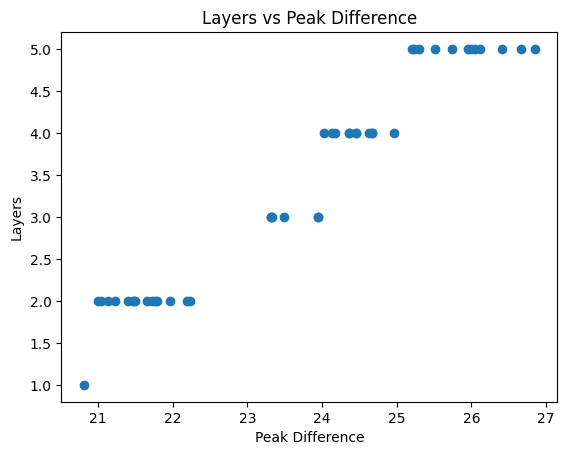

In [6]:
outlier_peakdif_removed = remove_outliers(df, "Peak Difference")
plt.title("Layers vs Peak Difference")
plt.scatter(outlier_peakdif_removed["Peak Difference"], outlier_peakdif_removed["Layers"])
plt.xlabel("Peak Difference")
plt.ylabel("Layers")

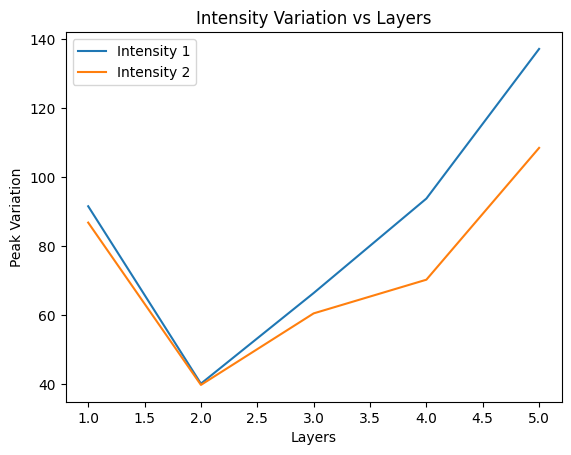

In [31]:
intensity1_variation = [df.loc[df['Layers'] == i]["Intensity 1"].std() for i in range(1,6)]
intensity2_variation = [df.loc[df['Layers'] == i]["Intensity 2"].std() for i in range(1,6)]
plt.title("Intensity Variation vs Layers")
plt.xlabel("Layers")
plt.ylabel("Peak Variation")
plt.plot(np.arange(1,6), intensity1_variation, label='Intensity 1')
plt.plot(np.arange(1,6), intensity2_variation, label='Intensity 2')
plt.legend()

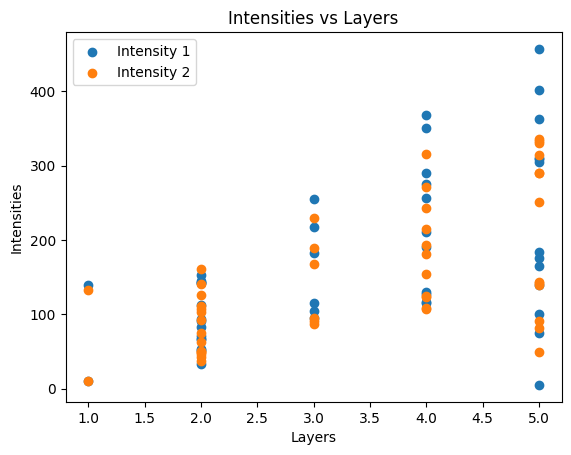

In [8]:
plt.title("Intensities vs Layers")
plt.scatter(df["Layers"],df["Intensity 1"],  label="Intensity 1")
plt.scatter(df["Layers"],df["Intensity 2"],  label="Intensity 2")
plt.ylabel("Intensities")
plt.xlabel("Layers")
plt.legend()

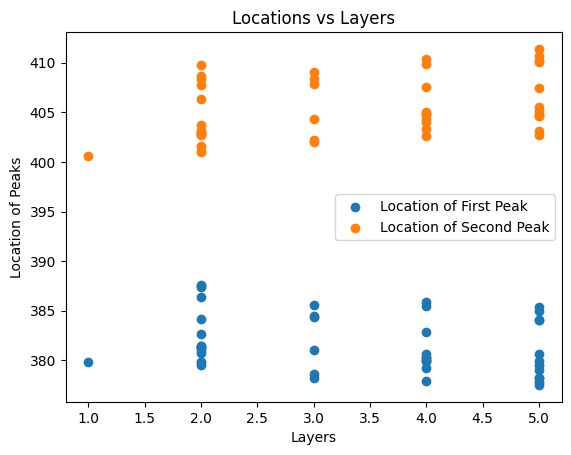

In [9]:
location_outliers_removed = remove_outliers(remove_outliers(df, "Peak 1"), "Peak 2")
plt.title("Locations vs Layers")
plt.scatter(location_outliers_removed["Layers"],location_outliers_removed["Peak 1"],  label="Location of First Peak")
plt.scatter(location_outliers_removed["Layers"],location_outliers_removed["Peak 2"],  label="Location of Second Peak")
plt.ylabel("Location of Peaks")
plt.xlabel("Layers")
plt.legend()

In [10]:
intensity_layer_regression = linear_model.LinearRegression()
X = df[["Intensity 1", "Intensity 2"]]
y = df["Layers"]
intensity_layer_regression.fit(X,y)

LinearRegression()

In [11]:
print(intensity_layer_regression.coef_)
print(intensity_layer_regression.intercept_)

[0.00162851 0.00712489]
2.033565642399373


[0.00162851 0.00712489]


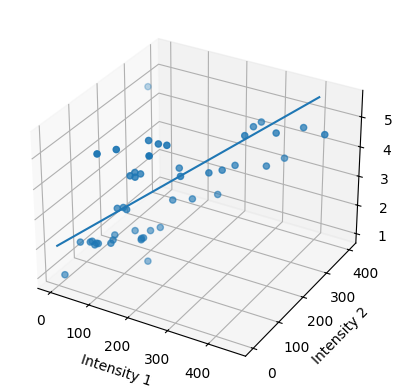

In [12]:
ax = plt.axes(projection='3d')

x = df["Intensity 1"]
y = df["Intensity 2"]
z = df["Layers"]
x_axis = np.linspace(0, 401, num=200)
y_axis = np.linspace(0, 401, num=200)
line = intensity_layer_regression.coef_[0] * x_axis + intensity_layer_regression.coef_[1] * y_axis + intensity_layer_regression.intercept_
ax.plot3D(x_axis,y_axis, line)
ax.set_xlabel("Intensity 1")
ax.set_ylabel("Intensity 2")
ax.set_zlabel("Layers")
ax.scatter3D(x,y,z)
print(intensity_layer_regression.coef_)

In [13]:
peak_layer_regression = linear_model.LinearRegression()
peak_outliers_removed = remove_outliers(remove_outliers(df, "Peak 1"), "Peak 2")
X = peak_outliers_removed[["Peak 1", "Peak 2"]]
y = peak_outliers_removed["Layers"]
peak_layer_regression.fit(X,y)

LinearRegression()

[3.02579336 3.03590209 3.04601081 3.05611954 3.06622826 3.07633699
 3.08644572 3.09655444 3.10666317 3.11677189 3.12688062 3.13698934
 3.14709807 3.15720679 3.16731552 3.17742424 3.18753297 3.19764169
 3.20775042 3.21785915 3.22796787 3.2380766  3.24818532 3.25829405
 3.26840277 3.2785115  3.28862022 3.29872895 3.30883767 3.3189464
 3.32905512 3.33916385 3.34927257 3.3593813  3.36949003 3.37959875
 3.38970748 3.3998162  3.40992493 3.42003365 3.43014238 3.4402511
 3.45035983 3.46046855 3.47057728]


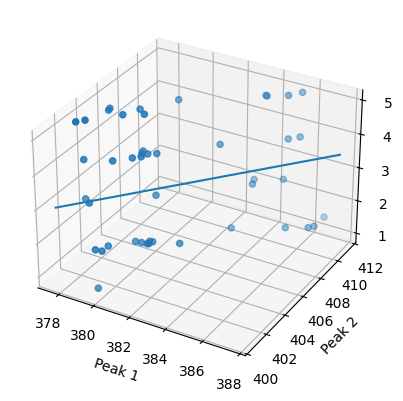

In [14]:
ax = plt.axes(projection='3d')
peak_outliers_removed = remove_outliers(remove_outliers(df, "Peak 1"), "Peak 2")
# x = peak_outliers_removed["Peak 1"]
# y = peak_outliers_removed["Peak 2"]

# x_mesh, y_mesh = np.meshgrid(x,y)
x_axis = np.linspace(X["Peak 1"].min(), X["Peak 1"].max(), num=45)
y_axis = np.linspace(X["Peak 2"].min(), X["Peak 2"].max(), num=45)
line = peak_layer_regression.coef_[0] * x_axis + peak_layer_regression.coef_[1] * y_axis + peak_layer_regression.intercept_
print(line)
# ax.plot_surface(x_mesh,y_mesh, line,alpha=0.01, color='g')
ax.plot3D(x_axis, y_axis, line)
ax.set_xlabel("Peak 1")
ax.set_ylabel("Peak 2")
ax.set_zlabel("Layers") 
ax.scatter3D(X["Peak 1"],X["Peak 2"],y)

In [15]:
import statsmodels.api as sm
X = peak_outliers_removed.loc[:, ["Peak 1", "Peak 2"]]
y = peak_outliers_removed.loc[:, "Layers"]
print(X.shape)
print(y.shape)
mod = sm.OLS(y,X, hasconst=True)
a = mod.fit()
a.summary2()

(45, 2)
(45,)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.938   
Dependent Variable: Layers           AIC:                25.8691 
Date:               2024-12-18 00:35 BIC:                29.4825 
No. Observations:   45               Log-Likelihood:     -10.935 
Df Model:           1                F-statistic:        667.7   
Df Residuals:       43               Prob (F-statistic): 8.01e-28
R-squared:          0.939            Scale:              0.099616
-------------------------------------------------------------------
          Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
-------------------------------------------------------------------
Peak 1   -0.6869     0.0268   -25.6549   0.0000   -0.7409   -0.6329
Peak 2    0.6552     0.0252    25.9876   0.0000    0.6044    0.7061
-----------------------------------------------------------------
Omnibus:               1.958        Durbin-Watson:          1.989
Prob(Omnibus):         0.376        Jarque-Bera (JB):       1.386
Skew:                  -0.194       Prob(JB):               0.500
Kurtosis:              2.233        Condition No.:          435  
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [16]:
pd.DataFrame({"Model Prediction" : a.predict(X.loc[:]), "Real Value": y})

,Model Prediction,Real Value
0,3.769550,4
1,3.882065,4
2,4.290199,4
3,1.965301,2
4,1.969571,2
6,4.473936,5
7,2.135252,2
8,3.753810,4
9,1.614913,2
10,4.680082,5


In [30]:
print(df.loc[df["Layers"] == 5])

    Unnamed: 0                                            File      Peak 1  \
6            6  Jacky/Shivani/Shivani Sample 1/MoS2_2_loc1.txt  379.939105   
10          10  Jacky/Shivani/Shivani Sample 1/MoS2_4_loc4.txt  379.074235   
12          12  Jacky/Shivani/Shivani Sample 1/MoS2_1_loc1.txt  379.108091   
15          15  Jacky/Shivani/Shivani Sample 1/MoS2_1_loc6.txt  379.492371   
18          18  Jacky/Shivani/Shivani Sample 2/MoS2_1_loc1.txt  378.241327   
20          20  Jacky/Shivani/Shivani Sample 2/MoS2_1_loc3.txt  380.596235   
25          25  Jacky/Shivani/Shivani Sample 3/MoS2_1_loc7.txt  377.528616   
26          26  Jacky/Shivani/Shivani Sample 3/MoS2_1_loc6.txt  378.190326   
28          28  Jacky/Shivani/Shivani Sample 3/MoS2_1_loc5.txt  377.817090   
43          43                   Jacky/Raman/MoS2_2_loc4_r.txt  385.424655   
44          44                   Jacky/Raman/MoS2_2_loc6_r.txt  384.982035   
46          46                   Jacky/Raman/MoS2_2_loc5_r.txt  